# 機械学習入門（講義）
担当：相澤宏旭

## 内容
データ分析入門の講義でPythonを用いてデータを読み込み，可視化し，そしてデータの説明する統計量を算出した．平均や分散といった統計量もデータの性質を我々が分析するうえで重要な手がかりとなるが，このような手がかりをコンピュータ自らがデータから学ぶことができないだろうか？そして，データと手がかりから対象の性質を予測することはできないだろうか？このような動機のもと，**機械学習（Machine Learning）** と呼ばれる研究分野は **人工知能（Artificial Intelligence）** の一分野として発展してきた．

特に，近年，機械学習技術の進展は著しい．突然だが，ゼロからはじめるプログラミングのサポートページの左上の猫の画像（もしくは静止画とした下の図）をみてほしい．実は，この画像は機械学習技術によってゼロから描き出された画像である．具体的には，[DALL·E 3](https://openai.com/dall-e-3)と呼ばれる **ニューラルネットワーク** でモデル化された言語から画像を生成する機械学習アルゴリズムで生成している（今回の画像の例では，**Minimalistic illustration of a cat programming on a laptop, suitable for a web page icon.** と言葉を与えた）．現在の機械学習技術はコンピュータは大量のデータから猫とコンピュータの知識・手がかりを学習し，これらを組み合わせることで画像を描き出すことができるまでに至っている．

![](./figs/gen_cats.png)

`````{admonition} 手軽に試せる機械学習技術
新しい最新の機械学習技術は[arXiv](https://arxiv.org/)と呼ばれる論文のプレプリントのリポジトリで日々公開されている．ここで公開されている論文を読み解き実装するのは大変であるが，論文によってはPythonのライブラリとして手法をGitHubで公開していたり，[Hugging Face](https://huggingface.co/)と呼ばれるサービスで気軽に試すことができる．
`````

このように非常にエキサイティングな研究分野であるが，その仕組みは複雑である．本講義のレベル上，簡略化された説明となってしまうが，機械学習の雰囲気を掴むことを目標とする．具体的には本講義資料で以下を学ぶ．

- 機械学習の概要を学ぶ．
- 線形回帰をScikit-Learnで実装する．
- 【発展】Numpyのみで線形回帰を実装する．

## 機械学習

まずは機械学習の雰囲気を掴むために必要最低限の概要と用語を学ぼう．

機械学習では，**タスク**（例：画像を生成する，気温から客数を予測する）を行うための **モデル** を複数のパラメータ $\theta$ を持つ関数 $f_{\theta}$ で考える．
ここでモデルを関数で考えるとは，下図に示すように，何らかの入力 $x$ からタスクに対応する出力 $y$ を計算する関数 $y=f_{\theta}(x)$ を設計することである（厳密にはパラメータ $\theta$ を求める．詳細は後述）．

![](./figs/overview_ml.png)

具体例を考えるとわかりやすい．上記の例では入力にハスキーの画像，出力は予測確率を出力する関数を考え，もっとも高い確率を持つ対象が予測された画像中に写る対象の名前とすると画像と対象の名前の関係性を関数 $f_{\theta}$ でモデル化した **物体認識** モデルとなる．また第12回の例のように入力が気温，出力がアイスクリームの売り上げと考えると，関数 $y=f_{\theta}(x)$ は気温とアイスクリームの売り上げの関係性をモデル化したものとなる．そして，後述するが，未知の入力 $x'$ に対して対応する出力 $y'$ が関数から得られるので，未知の画像中の対象の名前や気温からアイスクリームの売り上げを **予測** できる．

このような気温から売り上げを予測する問題のように機械学習に解かせたい問題のことを **タスク** と呼び，その種類は **分類** と **回帰** に大まかに分けることができる．分類は，言葉の通り，入力 $x$ に対応する **属性** を割り当てるタスクである．属性は**クラス**，**ラベル**とも呼ばれ，具体的には，上図のように，画像から犬を分類するようなタスクとなる．一方で，**回帰** はある入力 $x$ からその入力に対応する連続値の出力 $y$ を予測するタスクである．$x$ と $y$ を身長と体重，数学とプログラミングの成績，第12回のような気温とアイスクリームの売り上げで考えたときの，$x$ から $y$ の予測は回帰タスクの代表例である．

そして，機械学習技術のおもしろさはこれらのタスクを解くための関数 $f_{\theta}$ をデータから統計的に求めることにある．
求める方法は，**教師あり学習** と **教師なし学習** の二つに大まかに分類できる．これらの設定の違いは，タスクの正解データ（**教師データ**）が利用できるか否かの違いであり，どのような情報から関数 $f_{\theta}$ を学習するかがポイントとなる．

- 教師あり学習では，タスクの正解データが利用できる．モデルの予測 $y$ と正解データの違いを元に関数 $f_{\theta}$ を修正する．
    ![](./figs/supervised.png)
- 教師なし学習では，タスクの正解データが利用できない．モデル自らが与えられたデータの構造や特性を分析し，タスクに必要な情報を取り出すよう学習される．
    ![](./figs/unsupervised.png)

このようにタスク（分類 / 回帰...）をどのように解くか（教師あり / 教師なし）が機械学習において重要な前提条件となる．
本講義では，機械学習の基礎として **線形回帰（Linear Regression）** という技術をPythonを使って実装することを試みる．
線形回帰は教師あり学習の一種であり，名前の通り，回帰タスクを解くアルゴリズムである．
また最初の図で示したように，機械学習モデル $f_{\theta}$ は関数の作り方次第で柔軟に設計することができ，パラメータ化の方法や数が異なるだけで入出力の対応関係をモデル化するという観点でみると線形回帰もニューラルネットワークも本質的には同じである．

```{caution}
上記の機械学習の説明は非常に簡略化された説明であり，具体例も限定的である点に留意されたい．機械学習については専門科目または[別ページ](../advanced_materials.md)に参考資料を記載したので機械学習に興味がある学生は参照されたい．
```

## 線形回帰
前述したように，線形回帰の **回帰（Regression）** とはある入力 $x$ からその入力に対応する連続値の出力 $y$ を予測するタスクであり，線形回帰のモデル $f_{\theta}$ を求めるために，$x$に対応する正解データ $y$ を利用する教師あり学習を行う．まずは，第2回と同様に $y=2x + 1$ の方程式を例にしながら，回帰タスクを解くための関数 $f_{\theta}$ の説明をする．

このとき，線形回帰のゴールは未知の値 $x'$ が与えられ，そのときの $y$ の値を求めることであり，以下の図の赤線の関数を求めることである．関数の形 $y=ax+b$ と関数の傾き $a$ と切片 $b$ がそれぞれ $a=2$ と $b=1$ が既知の場合，計算は容易である（$y=2x+1$の場合，$x'=10$ならば対応する$y$は$21$）．しかしながら，もしこれらの $a,b$ がわからなかったらどうだろうか？また左図のようにデータに当てはまる関数はいくつも引くことができる．もっとも良い関数はどのように決定すれば良いだろうか？

![](./figs/linear_regression.png)

この関数を求めるために，線形回帰では，**線形** とあるように線形回帰では以下に示すような入力とパラメータ $\theta=\{a,b\}$ が線形の関係性を持つ関数，

$$
f_{\theta}(x) = ax + b,
$$

を仮定して，データ $(x,y)$ からパラメータ $\theta=\{a,b\}$ を求めることでタスクを解くための関数 $f_{\theta}$ を統計的に求める．そのために，教師あり学習の一種であると述べたように入力 $x$ と対応する出力 $y$ のペア $(x,y)$ のデータ集合を利用する（ただし，$a,b$はわからない）．線形回帰では計算された $a,b$ によって決まる関数と各データの差を最小化するようにパラメータ $a,b$ を求める（発展的な内容だが，これは解析的に計算することができる）．そして，一度，パラメータを求めてしまえば，未知の入力 $x'$ が与えられたとしてもそのときの $y$ の値を求めることができるという仕組みである．また計算されたパラメータ $a,b$ は，これらは入力 $x$ と出力 $y$ 間の関係性を示しており，データの背後に潜む関係性をペア $(x,y)$ から求めたとも言える．

$y=2x + 1$という例では利用場面をイメージすることが難しいだろうが，$y$と$x$をそれぞれ，身長と体重，数学とプログラミングの成績，第12回のような気温とアイスクリームの売り上げなどで考えると実用例が見えてくる．当日の気温$x$から売り上げ$y$が予測できれば，在庫管理も多少容易になるだろう．最初の画像生成を行うアルゴリズムとは見た目のインパクトのギャップがあるが，前述したように，高度な機械学習アルゴリズムであってもパターンを何らかのパラメータとして表現し，データから学習することは線形回帰と同じである．また，線形回帰は機械学習の基礎であり，機械学習の教科書では必ずと言っていいほど記載されているアルゴリズムであるため，Pythonによる機械学習プログラミングの第一歩として線形回帰を体験してほしい．

以降，その $a,b$ をPythonを使って求める．

## Scikit-Learnによる線形回帰
本講義は，以下の二つのライブラリを用いる．

- [Numpy](https://numpy.org)は複数の値を持つデータ間の計算をサポートするライブラリである．発展的な内容であるが，ベクトルや行列の計算が容易である．特に，逆行列の計算や固有値計算など線形代数で学んだ演算が手厚くサポートされている．公式ドキュメントの[Learn](https://numpy.org/learn/)という項目に基礎的な使い方がまとまっている．

- [Scikit-Learn](https://scikit-learn.org/stable/)は，本講義で扱う回帰だけでなく，分類，クラスタリング，次元削減など様々な機械学習やデータ分析のアルゴリズムが数多く実装されているライブラリである．詳しくは公式ドキュメントの[Examples](https://scikit-learn.org/stable/auto_examples/index.html#general-examples)という項目に代表的なアルゴリズムのサンプルコードがまとまっている．

NumpyとScikit-Learnは日本語で読める多くの書籍やWebページもあるので各自検索されたい．

前回前々回から多くのライブラリが紹介され混乱するかと思うが，前回の講義でも述べたようにこれらのライブラリのすべての機能を把握している必要はなく，必要に応じて適切に検索して活用してほしい．

### 準備
まずは本講義のプログラムで必要なライブラリをインポートとデータをダウンロードする．ライブラリの説明とインポート方法は [前回の講義](../05_lecture/introduction_to_data_analysis.ipynb) を参照されたい．

In [7]:
import numpy as np # numpyのimport
import matplotlib.pyplot as plt # 可視化のためのmatplotlibのimport．詳しくは第12回を参照
%matplotlib inline

In [8]:
# matplotlibの日本語の設定．詳しくは第12回を参照
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

```{caution}
実行環境によっては上記のMatplotlibの日本語の設定がうまくいかない場合があります．代替手段として，`japanize-matplotlib`ライブラリを使って日本語化する方法があります．詳細は前回の[タイトルなどが文字化けする場合](../05_lecture/introduction_to_data_analysis.ipynb)をご参照ください．

追記：`japanize-matplotlib`をインポート後に上記の`rcParams`によるフォントの変更を行うと日本語化ができないことがあるそうです．両者の日本語化を同時に行わないようにしてください．
```

以下のセルでデータをダウンロードする．

In [9]:
!wget https://raw.githubusercontent.com/ground-zero-programming/zero-pro-data/refs/heads/main/data/machine_learning/lecture/data.npy -O data.npy
!wget https://raw.githubusercontent.com/ground-zero-programming/zero-pro-data/refs/heads/main/data/machine_learning/lecture/target.npy -O target.npy


--2024-11-13 15:32:43--  https://raw.githubusercontent.com/ground-zero-programming/zero-pro-data/refs/heads/main/data/machine_learning/lecture/data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368 [application/octet-stream]
Saving to: 'data.npy'

data.npy            100%[===================>]     368  --.-KB/s    in 0s      

2024-11-13 15:32:43 (35.1 MB/s) - 'data.npy' saved [368/368]

--2024-11-13 15:32:44--  https://raw.githubusercontent.com/ground-zero-programming/zero-pro-data/refs/heads/main/data/machine_learning/lecture/target.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

### データの読み込み
続いて，線形回帰に用いるデータ `X`, `y` を作成する．今回はNumpyによるデータ読み込み関数 `np.load`関数から先ほどダウンロードしたデータを読み込む．

In [10]:
X = np.load('data.npy')
y = np.load('target.npy')

読み込まれたデータ `X` と `y` はそれぞれ入力されるデータと入力に対応する目標出力である．前述の例と照らし合わせると，`X` と `y` の各要素は入出力のペア $(x,y)$ に該当し，このペアが $N$ 個（今回は$N=30$）含まれていることになる．

以下のセルで確認されたい．

In [11]:
X

array([[0.        ],
       [0.03448276],
       [0.06896552],
       [0.10344828],
       [0.13793103],
       [0.17241379],
       [0.20689655],
       [0.24137931],
       [0.27586207],
       [0.31034483],
       [0.34482759],
       [0.37931034],
       [0.4137931 ],
       [0.44827586],
       [0.48275862],
       [0.51724138],
       [0.55172414],
       [0.5862069 ],
       [0.62068966],
       [0.65517241],
       [0.68965517],
       [0.72413793],
       [0.75862069],
       [0.79310345],
       [0.82758621],
       [0.86206897],
       [0.89655172],
       [0.93103448],
       [0.96551724],
       [1.        ]])

In [12]:
y

array([[1.00336195],
       [1.03005238],
       [1.36318086],
       [1.11537301],
       [1.09168302],
       [1.30051601],
       [1.40539285],
       [1.42723979],
       [1.63878499],
       [1.47311363],
       [1.60954637],
       [1.65122269],
       [1.726774  ],
       [2.05340564],
       [2.03357146],
       [2.02038577],
       [2.03971773],
       [1.95621527],
       [2.10546272],
       [2.2790195 ],
       [2.52384041],
       [2.48606695],
       [2.57296159],
       [2.68623724],
       [2.68973201],
       [2.64155146],
       [2.81280669],
       [2.75291451],
       [2.93954453],
       [2.91164229]])

実行環境によっては一部省略されるが `X` と `y` 共に数値の集合が出力されたかと思う．これが今回の線形回帰で扱うデータになる．

また発展的な内容であるが，これらのデータは$30$個の要素を持つベクトル（=$30$行$1$列の行列）として保存されている．これは`名前.shape`で確認できる．以下のセルを実行されたい．

In [13]:
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

X.shape: (30, 1), y.shape: (30, 1)


また，読み込まれたデータはNumpyの`array`と呼ばれるデータ型で管理される．データ型は `type(名前)` でわかる．

In [14]:
print(f'type(X): {type(X)}, type(y): {type(y)}')

type(X): <class 'numpy.ndarray'>, type(y): <class 'numpy.ndarray'>


ここまでで利用するデータの読み込みが完了した．Numpyについてもう少し詳しく知りたい受講者は後述する 【発展】Numpyの使い方 を参考にされたい．

### データの可視化
前回でも述べたようにデータをグラフなどを用いて視覚的に表示してみることは非常に重要である．特に，前述の数値だけではデータ `X` と `y` の関連性はわからない．ここでも matplotlib を用いて `X` と `y` を可視化する．matplotlibの使い方は前回の資料を確認されたい．

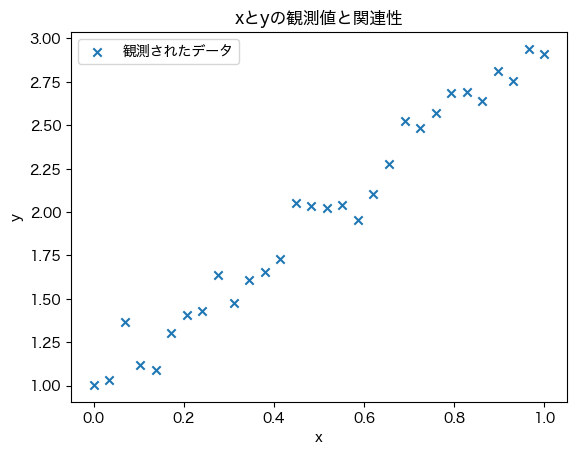

In [15]:
plt.scatter(X, y, marker='x', label='観測されたデータ') # 散布図のプロット
plt.title('xとyの観測値と関連性') # タイトルを追加
plt.xlabel('x') # x軸のラベルを追加
plt.ylabel('y') # y軸のラベルを追加
plt.legend()

データの可視化を見ると正の相関があり，`X` と `y` の間には，最初の例のように，$y=ax+b$ の関係性が潜んでいるように思える．

### Scikit-Learnによる線形回帰の学習
では，実際に，**Scikit-Learn** という機械学習のライブラリを用いて，`X` と`y` のペアからなるデータから $y=ax+b$ の $a$ と $b$ を計算することを試みる．

Scikit-Learnで線形回帰を実行するためには `LinearRegression`クラスをインポートする必要がある．以下のセルで実行する．

In [16]:
from sklearn.linear_model import LinearRegression

インポートした `LinearRegression` クラスをインスタンス化し，(`X,y`)のペアをインスタンスメソッド `fit` に渡すと計算できる．

In [17]:
reg = LinearRegression()
reg = reg.fit(X, y)

インスタンス `reg` のインスタンスメソッド `reg.fit(X, y)` の処理で `X` と `y` から計算された傾きと切片がインスタンス変数に格納される．傾き $a$ と切片 $b$ はそれぞれ`coef_`と`intercept_`という名前で管理され，第10回で学んだように `.` でアクセスできる．

In [18]:
print(f'傾き a = {reg.coef_}, 切片 b = {reg.intercept_}')

傾き a = [[2.00937943]], 切片 b = [0.97335419]


傾きと切片をみると `2` と `1` に近い値が得られたことがわかり，数値データの集合からデータの背後に潜む $y=ax+b$ で表現される関係性をパラメータ $a, b$ の線形回帰から求めることができた．

### 結果の確認
最後に計算された傾きと切片をプロットしてみよう．

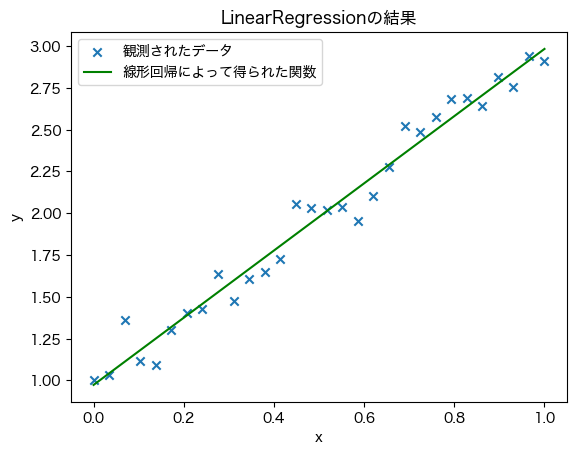

In [19]:
a = reg.coef_
b = reg.intercept_
y_= a * X + b

plt.scatter(X, y, marker='x', label='観測されたデータ') # 散布図のプロット
plt.plot(X, y_, c='g', label='線形回帰によって得られた関数') # 直線のプロット
plt.title('LinearRegressionの結果') # タイトルの追加
plt.xlabel('x') # x軸のラベルを追加
plt.ylabel('y') # y軸のラベルを追加
plt.legend()

このように，ライブラリを使うと非常に簡単に機械学習・データ分析のアルゴリズムを利用することができ，とても便利な仕組みである．しかし，ここまでの用意されたデータを元にセルを実行しただけではプログラミング感なくゼロから始めるプログラミングの講義が終了してしまう．そこで，前述の線形回帰のプログラムを，

1. Numpyでベクトルや行列を定義し計算を実行する → 【発展】Numpyの使い方
2. `np.load`関数で読み込む代わりにNumpyの関数を使って自分で生成する →【発展】データの生成
3. 自分で生成したデータを使ってScikit-Learnによる線形回帰を実行する →【発展】Scikit-Learnを利用して生成したデータから線形回帰を解く
4. Scikit-Learnの代わりに自身で線形回帰の計算を実行する →【発展】Scikit-Learnを利用せずに線形回帰を解く

の4つの手順に分けて紐解く資料を用意した．線形代数を学んでいない学生も受講しているため，発展的な内容として位置付けたが，ぜひ最後まで実行してみてほしい．

```{admonition} Scikit-Learnを用いた線形回帰のまとめ
- Scikit-Learnは機械学習のアルゴリズムがまとめられたライブラリである
- Scikit-Learnの`LinearRegression`クラスで線形回帰を実行できる
- ライブラリを利用するためは実装された機能の仕様を調べる必要がある
```

---

## 【発展】 Numpyの使い方
前述したように，Numpyは複数の値を持つベクトルや行列を計算するためのライブラリである．ここでは後述する内容を理解するためにNumpyの必要最低限の使い方を紹介する．

### Numpyによるベクトルの定義
線形回帰や機械学習に限らず，データを扱う場面では，複数の値を持つベクトルや行列を扱うことが多々ある．今回の線形回帰の例でも複数の $(x,y)$ のデータからパラメータ $a,b$ を計算する必要があり，このとき，複数の$(x,y)$を保存したデータは行列として扱う必要がある．また，前回の講義ではPandasの`DataFrame`を用いて行と列から構成されるデータ構造を扱った．`DataFrame`は条件に基づく値の操作や統計量の算出を直感的に行えるが，例えば，行列計算をしようと思うと一手間必要となる．

このような場面で便利なのがNumpyの`array`というデータ型である．先ほどはNumpyの`array`型を`type`関数で確認するのみだったが，以降のセルで`array`型を使うと容易にベクトルや行列の計算が簡単に行えることを確認されたい．

では，まずは，要素を一列に並べた一次元配列としてベクトル $\mathbf{a}=[1,2,3]$ を定義しよう（本講義資料では，ベクトルは小文字で太字で，行列は大文字で太字で記述する）．ベクトルや行列は以下で定義できる．

```python
名前 = np.array(要素)
```

まずは Numpyを`import`する．慣習上，`np`と短縮系で`import`する（復習→[モジュールのインポート](../05_lecture/introduction_to_data_analysis.ipynb)）

In [20]:
import numpy as np

ベクトルを定義する．

In [21]:
a = np.array([1,2,3])

In [22]:
a

array([1, 2, 3])

上記のように，Numpyでは要素としてリスト（またはタプル）を与えて定義する．`type`関数でデータの型を確認されたい．

In [23]:
type(a)

numpy.ndarray

続いて，ベクトル内の要素数を`名前.shape`で確認する．

In [24]:
a.shape

(3,)

3つの要素が`a`に含まれていることがわかる．

厳密にはNumpyには一次元に要素を並べた一次元配列によるベクトル形式とこれまでに学んだ縦ベクトル・横ベクトル（=行ベクトル・列ベクトル）形式がある．受講者にとっては後者のベクトルの表記の方が親しみがあるだろう．Numpyで縦ベクトル・横ベクトルを作成する．

以下のセルのように `[]` を使って定義すると横ベクトル版の $\mathbf{a}=[1,2,3]$ が定義できる．

In [25]:
b = np.array([[1, 2, 3]])
b

array([[1, 2, 3]])

続いて，縦ベクトル $\mathbf{a}=[1,2,3]^\top$ を作成する．

In [26]:
c = np.array([[1], [2], [3]])
c

array([[1],
       [2],
       [3]])

慣れるまではわかりにくいだろうが，`shape`でベクトルの形状を確認しながらプログラミングすると良い．

In [27]:
print(f'a.shape: {a.shape}, b.shape: {b.shape}, c.shape: {c.shape}')

a.shape: (3,), b.shape: (1, 3), c.shape: (3, 1)


上記のセルのようにベクトルの形状を確認すると定義したベクトルの違いがわかる．`a`は複数の値を一次元に並べただけに対して，`b`と`c`は行方向または列方向に値を並べたデータになっていることがわかる．

### Numpyによる行列の定義
続いて，同様に`np.array`を利用して行列を作成する．作成すると言っても`np.array`の要素の与え方が異なるだけである．以下の行列

$$\mathbf{A} = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix}$$

は次のセルで定義できる．

In [28]:
A = np.array([[1, 2], [3, 4]])

In [29]:
A

array([[1, 2],
       [3, 4]])

値が2行2列のデータ型に格納されていることがわかる．

In [30]:
A.shape

(2, 2)

同様に，`A.shape`とすると行列の行数と列数が取得できる．

### Numpyによる行列計算
ベクトルと行列の定義の次は線形代数で学んだ行列計算をNumpyを用いて実装することを試みる．まずはじめに，次の行列 $\mathbf{A}, \mathbf{B}$ を定義する．

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix},
\mathbf{B} = \begin{bmatrix}
5 & 6 \\
7 & 8 \\
\end{bmatrix} \\
$$

In [31]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

定義された行列の`shape`や中身の要素は各自確認されたい．以下のセルで行列の和 $\mathbf{A} + \mathbf{B}$ を計算する．

In [32]:
A + B

array([[ 6,  8],
       [10, 12]])

引き算も `-` の演算子で計算できる．

In [33]:
A - B

array([[-4, -4],
       [-4, -4]])

行列の積  $\mathbf{A}\mathbf{B}$ を計算しよう．行列 $\mathbf{A}, \mathbf{B}$ はそれぞれ2行2列の行列なので， $\mathbf{A}$ の列数と $\mathbf{B}$ の行数が等しいので行列の積  $\mathbf{A}\mathbf{B}$ が計算できる．行列の積は `np.dot`関数や`np.matmul`関数で計算できる．

In [34]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [35]:
np.matmul(A, B)

array([[19, 22],
       [43, 50]])

プログラミングでも線形代数で学んだ計算のルールは同じである．そのため，行数と列数によってはエラーとなることに注意されたい．繰り返しとなるが`shape`でベクトルや行列の形状を把握しておくことが大切である．以降は逆行列など本講義に関連するNumpyの機能をいくつか紹介するが数多くサポートされている行列計算の一部である．線形代数で学んだ計算のほとんどはNumpyで実装可能なので復習も兼ねて各自で調べてみることをおすすめする．

```{tip}
NumpyだけでなくPythonには数学関連のライブラリが多くある．特に，[Sympy](https://www.sympy.org/en/index.html)はシンボルとして計算式を定義でき，直感的に数式をプログラミングできる．具体例の計算やグラフの可視化が容易であり，抽象的な大学数学を学ぶ助けとなるはずである．
```

## 【発展】 データの生成
Numpyの必要最低限の基礎を紹介した後は，`np.load`関数で事前に用意したデータを利用する代わりに自身でデータを生成することを試みる．後述するように，データ数（`N`），傾き（`a`），切片（`b`），変動量（`noise_scale`）を制御することができ，線形回帰の特性をデータを変更することから確認できるようになる．

先ほどの例と同様に，ここでは第12回の講義のように複数個（$N$個）の $(x,y)$ のペアデータが利用できること，各データの入出力間には $y=2x+1$ という関係性があると仮定し，Numpyを用いて以下の手順で生成する．

まずはデータの個数の定義する．ここでは $N=30$ とする．

In [36]:
N = 30

続いて，個数 `N` に応じたデータをNumpyの `linspace` 関数を利用して作成する．`numpy` は `np` としてインポートしたので以下のように呼び出すことができる．`linspace`関数のサンプルコードは後述したので確認されたい．

実際に，$0$ から $1$ の範囲で $N=30$ 個の値を持つベクトルを作成する．

In [37]:
X = np.linspace(0, 1, N) # xの値

値を確認する．

In [38]:
X

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

Numpyでは `名前.shape` とすると要素数がわかる．今回は $N=30$ 個の値を持つ一次元に並べられたベクトルなので `(30,)` と表示される．

In [39]:
X.shape

(30,)

最後に `X` に対応する `y` を作成する．ただし，一般的には気温など観測値にノイズが載る（ここでは `y` が観測値）．これを `Numpy` の `random` モジュールの `randn` 関数を用いて乱数を生成することでノイズを表現する．まずはノイズが乗っていないデータ `y_gt` を生成する．

In [40]:
y_gt = 2 * X + 1 # y=2x+1の真の値

続いて，ノイズが付加された出力 `y` を作成する．`noise_scale`変数はノイズの大きさを示す．

In [41]:
noise_scale = 0.1
y = 2 * X + 1 + noise_scale * np.random.randn(N) # 一定のノイズがのった観測データ

中身を確認する．

In [42]:
y_gt

array([1.        , 1.06896552, 1.13793103, 1.20689655, 1.27586207,
       1.34482759, 1.4137931 , 1.48275862, 1.55172414, 1.62068966,
       1.68965517, 1.75862069, 1.82758621, 1.89655172, 1.96551724,
       2.03448276, 2.10344828, 2.17241379, 2.24137931, 2.31034483,
       2.37931034, 2.44827586, 2.51724138, 2.5862069 , 2.65517241,
       2.72413793, 2.79310345, 2.86206897, 2.93103448, 3.        ])

In [43]:
y

array([0.85897376, 1.07609371, 1.09536548, 1.08068727, 1.24659247,
       1.51661317, 1.23371403, 1.4632651 , 1.53033483, 1.72497806,
       1.73368056, 1.76373496, 1.89232792, 1.94880826, 1.8944682 ,
       2.14705036, 1.95938165, 2.0826266 , 2.19290777, 1.93443116,
       2.46062706, 2.47003628, 2.44181349, 2.59913706, 2.54124729,
       2.68301951, 2.83837727, 2.91691416, 3.00625491, 2.91525065])

ノイズが付加されたため異なる値であることがわかる．ここまでで線形回帰で利用するデータの生成は完了であるが，上記の処理をこの後複数回呼び出す必要があるため関数化しておく．

In [44]:
def make_data(N, a, b, noise_scale):
    X = np.linspace(0, 1, N) # xの値
    y_gt = a * X + b # y=ax+bの真の値
    y = a * X + b + noise_scale * np.random.randn(N) # 一定のノイズがのった観測データ
    return (X, y, y_gt)

### 補足：`linspace`関数の説明
`linspace` 関数は引数としてスタートの値，最後の値，個数を与える．以下の例のように，$0$ から $10$ の範囲で $4$ 個の値をもつベクトルを作成できる．

In [45]:
x = np.linspace(0, 10, 4)
print(x)

[ 0.          3.33333333  6.66666667 10.        ]


### 補足：乱数の生成
`np.random.randn` は **正規分布** から引数として与えられる個数だけ乱数を生成する．

In [46]:
random_value = np.random.randn(3)
print(random_value)

[-0.51569254  0.86575629 -0.79933332]


そのため，`noise_scale=0.1`より`noise_scale * np.random.randn(N)` は $0.1$倍した $N$ 個の乱数を正規分布から生成する処理となる．

## 【発展】 Scikit-Learnを利用して生成したデータから線形回帰を解く
先ほどの例と同様にScikit-Learnを利用して線形回帰を解く．ただし，`np.load`関数で得られたデータ `X`と`y`ではなく自身で生成したデータ `X`と`y`に対して行う．`LinearRegression`クラスの使い方は先ほどと同様であるが，入力前にデータを加工する必要があるので注意されたい（これは実装された`LinearRegression`クラスの仕様によるものである）．

再度，線形回帰の前提について復習しておくと，今から線形回帰 `LinearRegression` を用いて，$(x,y)$ から $y=ax+b$ の $a$ と $b$ を計算することを試みる．前述のセルで作成したデータで考えると，$x$ は `X`，$y$ は `y` に対応する．ノイズが含まれた数値の集合データである `X` と `y` の情報のみ我々が利用することができ，データを生成したときに利用した `y_gt`, `a=2`, `b=1` という情報は一切知ることができないということに注意されたい．

### データの生成と加工
まずは【発展】データ生成で作成した `make_data` 関数を用いてデータを生成する．

In [47]:
X, y, y_gt = make_data(30, 2, 1, 0.1)

続いて，作成されたデータ `X`, `y` は一次元配列のベクトル（復習→Numpyの基礎）であるため`LinearRegression`クラスの仕様に従い縦ベクトルへ変換する．これはこれまでの説明のように，$y=ax+b$ という線形結合の式で表現されるモデルを利用しているためである．

In [48]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]

`np.newaxis`の説明は後述する．

### 線形回帰モデルの当てはめ
作成したデータで線形回帰を行うために，再度，先ほどの`LinearRegression` クラスをインスタンス化し，(`X,y`)のペアをインスタンスメソッド `fit` に渡す処理を再度行う．

In [49]:
reg = LinearRegression()
reg = reg.fit(X, y)

### 結果の確認と可視化

In [50]:
print(f'傾き a = {reg.coef_}, 切片 b = {reg.intercept_}')

傾き a = [[2.0154877]], 切片 b = [1.00216861]


傾きと切片をみると，データを生成するときに設定した `2` と `1` に近い値が得られたことがわかる．この結果はデータの関係性，データ数 $N$，ノイズの大きさなどの要因で変化するので一度自分で確かめてみると良い．

値を確認するだけでなく実際に `X` に対して計算することでグラフのプロットを試みる．計算された値がノイズがない真の関係性 $y=2x+1$ に近いことを確認されたい．

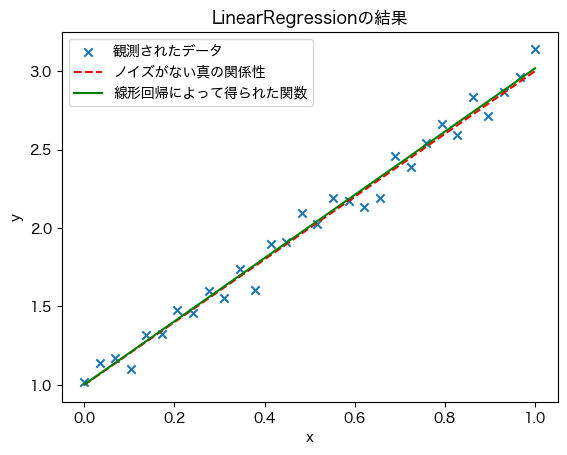

In [51]:
a = reg.coef_
b = reg.intercept_
y_pred = a * X + b

plt.scatter(X, y, marker='x', label='観測されたデータ')
plt.plot(X, y_gt, c='r', linestyle='--', label='ノイズがない真の関係性')
plt.plot(X, y_pred, c='g', label='線形回帰によって得られた関数')
plt.title('LinearRegressionの結果')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

```{tip}
`LinearRegression`クラスの中身はScikit-Learnの[リファレンスページ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)へアクセスし，ページ中にある [SOURCE](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/linear_model/_base.py#L529) からGitHub上で公開されているコードを見ることができる．中身を見るとこれまでの講義で学んだ条件分岐，関数，例外だがクラスといった機能で書かれていることがわかる．ゼロから学ぶプログラミングが，このようなプログラムを読み解けるヒントになるだけでなく，自身でソフトウェアを開発して公開するきっかけになれば幸いである．
```

### 補足：`np.newaxis`
`np.newaxis`は名前の通り軸を追加する変数である．軸を追加するとは (30,) のベクトルを (30,1) の縦ベクトルに変換する処理である．実際に以下の例で確認されたい．

In [52]:
a = np.linspace(0,5,5)
print(f'ベクトル a の中身は {a} であり，形状は {a.shape} である．')

b = a[:,np.newaxis]
print(f'newaxisしたベクトル b の中身は {b} であり，形状は {b.shape} である．')

ベクトル a の中身は [0.   1.25 2.5  3.75 5.  ] であり，形状は (5,) である．
newaxisしたベクトル b の中身は [[0.  ]
 [1.25]
 [2.5 ]
 [3.75]
 [5.  ]] であり，形状は (5, 1) である．


Numpyによるベクトルの定義で用いた例を使うと以下のセルとなる．縦ベクトルなるように再度ベクトルを定義することなく変換できていることがわかる．

In [53]:
a = np.array([1,2,3])
print(f'ベクトル a の中身は {a} であり，形状は {a.shape} である．')

b = a[:,np.newaxis]
print(f'newaxisしたベクトル b の中身は {b} であり，形状は {b.shape} である．')

ベクトル a の中身は [1 2 3] であり，形状は (3,) である．
newaxisしたベクトル b の中身は [[1]
 [2]
 [3]] であり，形状は (3, 1) である．


## 【発展】 Scikit-Learnを利用せずに線形回帰を解く
利用するだけなら，Scikit-Learnは便利なライブラリである．ここでは，敢えて，便利なライブラリを使わず，数式に基づいて線形回帰を解く方法を紹介する．

そのために，線形回帰の解析解は以下の閉形式で与えられることを利用する．

$$
\mathbf{W} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$

この式は **正規方程式（Normal Equation）** と呼ばれる．

この正規方程式は最小二乗法と呼ばれる予測値と目標の出力値（目的変数）間の差から導出できる．最小二乗法のアイデアは差を二乗誤差誤差として定義し，最小となるパラメータを偏微分から求める．より簡単にいうと，高校で学んだ関数の最小値を求めるときと同じように，関数をパラメータで微分し，0となるようなパラメータを求めている．以下に正規方程式の導出に記載したので興味があれば読んでみて欲しい．

```{admonition} 正規方程式の導出
:class: tip, dropdown

$D$次元のベクトル $\mathbf{x}$ とその目的変数 $y$ からなるペアを $N$ 個与えられ，そのサンプル集合 $\{\mathbf{x}_{i},y_{i}\}^{N}_{i=1}$ を最もよく表す線形モデルのパラメータ $\mathbf{W}$ は次の正規方程式で求めることができる．

$$
\mathbf{W} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$

この正規方程式を導出するためにはじめにサンプル集合を行列として表記すると，

$$
\mathbf{X}=\left[\begin{array}{ccccc}
1 & x_{11} & x_{12} & \ldots & x_{1 D} \\
1 & x_{21} & x_{22} & \ldots & x_{2 D} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N 1} & x_{N 2} & \ldots & x_{N D}
\end{array}\right]
$$

となり，各行（第 $i$ 行）は $i$ 番目の観測データ $\mathbf{x}_i$ を示している．一列目の $1$ は切片（バイアス項とも呼ばれる）を示しており，この行列は $N \times (D+1)$ のサイズを持つことに注意されたい．

目的変数は $N$ 個の値を持つベクトルとして次のように書くことができる．

$$
\mathbf{y}=\left[\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{array}\right]
$$

ここで $y_i$ は $i$ 番目の観測データの目的変数である．

関数 $f_{\theta}$ のパラメータ $\mathbf{W}$ は切片を含むことに注意すると $D+1$ 次元のベクトルとして次のように定義できる．

$$
\mathbf{W}=\left[\begin{array}{c}
w_0 \\
w_1 \\
\vdots \\
w_D
\end{array}\right]
$$

ここで $w_0$ は切片に対応するパラメータであり，$w_1$ から $w_D$ は観測データの各次元に対応する．

行列で表記した $\mathbf{X}, \mathbf{y}, \mathbf{W}$ を使って線形回帰の式を表記すると次のように書くことができる．

$$
\mathbf{y} = \mathbf{X}\mathbf{W}
$$

実際にこの行列を計算してみると以下のように

$$
\begin{aligned}
y_1 & =w_0+w_1 x_{11}+w_2 x_{12}+\cdots+w_D x_{1 D} \\
y_2 & =w_0+w_1 x_{21}+w_2 x_{22}+\cdots+w_D x_{2 D} \\
& \vdots \\
y_N & =w_0+w_1 x_{N 1}+w_2 x_{N 2}+\cdots+w_D x_{N D}
\end{aligned}
$$

最初の説明で登場した $y=ax+b$ のように各目的変数の値が観測データとパラメータとの線型結合になっていることが確認できる．

線形回帰では目的変数 $\mathbf{y}$ と回帰された予測値 $\mathbf{X}\mathbf{W}$ の差の二乗和が最小になるようにパラメータ $\mathbf{W}$ を求める．この差の二乗和は二乗誤差関数として呼ばれ，次のように定義される．

$$
J(\mathbf{W})=(\mathbf{y}-\mathbf{X} \mathbf{W})^{\top}(\mathbf{y}-\mathbf{X} \mathbf{W})
$$

要素ごとに展開してみると，$i$番目の誤差 $e_i$ の計算は次のようになっており，

$$
e_i=y_i-\left(w_0+w_1 x_{i 1}+w_2 x_{i 2}+\cdots+w_D x_{i D}\right)
$$

二乗誤差は，この誤差を全てのデータにわたって合計したものとなる．

$$
J(\mathbf{W})=\sum_{i=1}^N e_i^2=\sum_{i=1}^N\left(y_i-\left(w_0+w_1 x_{i 1}+w_2 x_{i 2}+\cdots+w_D x_{i D}\right)\right)^2
$$

そして，この二乗誤差関数が最小となるパラメータ $\mathbf{W}$ を求めたいので，パラメータ $\mathbf{W}$ で偏微分し，その導関数が0となるように方程式を解けば良い．

まず二乗誤差について整理すると

$$
\begin{align}
(\mathbf{y}-\mathbf{X} \mathbf{W})^\top(\mathbf{y}-\mathbf{X} \mathbf{W}) &= \left(\mathbf{y}^\top-\mathbf{W}^\top \mathbf{X}^\top\right)(\mathbf{y}-\mathbf{X} \mathbf{W}) \\
&=\mathbf{y}^\top \mathbf{y}-\mathbf{W}^\top \mathbf{X}^\top \mathbf{y}-\mathbf{y}^\top \mathbf{X} \mathbf{W}+\mathbf{W}^\top \mathbf{X}^\top \mathbf{X} \mathbf{W}
\end{align}
$$

となり，これをパラメータ $\mathbf{W}$ で偏微分したときに 0 となる方程式を立てる．

$$
\frac{\partial(\mathbf{y}-\mathbf{X} \mathbf{W})^\top(\mathbf{y}-\mathbf{X} \mathbf{W})}{\partial \mathbf{W}}=-\frac{\partial \mathbf{W}^\top \mathbf{X}^\top \mathbf{y}}{\partial \mathbf{W}}-\frac{\partial \mathbf{y}^\top \mathbf{X} \mathbf{W}}{\partial \mathbf{W}}+\frac{\partial \mathbf{W}^\top \mathbf{X}^\top \mathbf{X} \mathbf{W}}{\partial \mathbf{W}}=0
$$

ベクトル・行列の微分に注意して計算すると次の等式が得られ，

$$
\mathbf{X}^\top \mathbf{y} = \mathbf{X}^\top \mathbf{X} \mathbf{W}
$$

これを整理すると正規方程式が導出できる．

$$
\mathbf{W} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$

以上，線形代数とベクトル・行列の微分の知識より正規方程式の導出をすることができた．

```

式の意味や導出は無視しても，線形代数を受講した学生ならば，上記の正規方程式とデータ $\mathbf{X}, \mathbf{y}$がわかっていれば，傾きと切片のパラメータである $\mathbf{W}$ の計算は容易であるはずである．

### データの生成と加工
先ほどの【発展】Scikit-Learnを利用して生成したデータから線形回帰を解くと同様に，以下のようにデータを生成・修正する．

In [54]:
X_, y, y_gt = make_data(30, 2, 1, 0.1)

In [55]:
X_ = X_[:,np.newaxis]
y = y[:,np.newaxis]

ここで，切片 $b$ を作成するために以下の処理を行う．`LinearRegression`クラスでは内部で以下と同等の処理をおこなっている．

In [56]:
X = np.hstack((X_, np.ones((N, 1))))

上記の処理の意味は，式で書くと，$y=ax+b$ を $y=ax_0+bx_1$ （ただし，$x_0=x, x_1=1$）という形で書き換えている．これは傾きと切片を同じ $\mathbf{W}$ という行列で表現するためにである．そのため，インデキシングを用いて修正前の行列 `X_` と修正後の行列 `X` の5番目のデータ (index=4) を参照すると以下のようになっている．

In [57]:
print(X_[4])
print(X[4])

[0.13793103]
[0.13793103 1.        ]


$x_0$, $x_1$が$x_0=x, x_1=1$となっていることがわかる．ここまででデータの準備は完了である．

#### 補足：`np.hstack`
`np.hstack`関数の処理を以下のコードで確認されたい．まず元々の$x_0$を作成．

In [58]:
M = 5
a = np.linspace(0,5,M)
b = a[:,np.newaxis]

In [59]:
b

array([[0.  ],
       [1.25],
       [2.5 ],
       [3.75],
       [5.  ]])

続いて，すべて `1` が格納された `M` 個の要素を持つベクトルを作成する．これは`np.ones`で作成できる．

In [60]:
c = np.ones((M, 1))

作成した `b` と `c` を `np.hstack` で結合する．ただし，

```
b = array([[0.  ],
          [1.25],
          [2.5 ],
          [3.75],
          [5.  ]])

c = array([[1.],
           [1.],
           [1.],
           [1.],
           [1.]])
```
である．

In [61]:
d = np.hstack((b, c))

上記のサンプルコードから `b`と`c`の結合が実現でき， $y=ax_0+bx_1$ （ただし，$x_0=x, x_1=1$）が実装できたことがわかる．

### 正規方程式からの解析解の導出
線形回帰の解析解は以下で導出できた．

$$
\mathbf{W} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$

プログラムコードの可読性の観点から，上記の式を以下のように分割して計算する．

$$
\mathbf{W}_1 = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \\
\mathbf{W}_2 = \mathbf{X}^\top \mathbf{y} \\
\mathbf{W} = \mathbf{W}_1 \mathbf{W}_2
$$

まず，$\mathbf{W}_1$ を計算する．以下のコードで実装できる．

In [62]:
W_1 = np.linalg.inv(np.dot(X.T, X))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


続いて，$\mathbf{W}_2$ を計算する．以下のコードで実装できる．

In [63]:
W_2 = np.dot(X.T, y)

最後に，$\mathbf{W}$ を計算する．以下のコードで実装できる．

In [64]:
W = np.dot(W_1, W_2)

上記の処理は１行で書くこともできる．

In [65]:
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### 補足：行列の転置
Numpyでは，行列の転置は `行列.T` でできる．以下のサンプルコードで確認されたい．

In [66]:
A = np.array([[0,1],[2,3]])
A

array([[0, 1],
       [2, 3]])

In [67]:
A.T

array([[0, 2],
       [1, 3]])

#### 補足：逆行列の計算
逆行列の計算は `np.linalg.inv` 関数を利用すれば良い．

In [68]:
A = np.array([[0,1],[2,3]])
A_inv = np.linalg.inv(A)
A_inv

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

```{caution}
`np.linalg.inv`では逆行列が存在しない特異行列の場合はエラーとなるので注意されたい．また，発展的な内容であるが，本講義で用いたデータの $\mathbf{X}$ は小さい行列であるが，データによっては非常に巨大な行列となる．このように，正規方程式からの線形回帰は逆行列の計算を含むため特異行列や巨大な行列のときは適さない．
```

### 傾きと切片の確認
計算された `W` について，傾きと切片を確認する．

In [69]:
W

array([[1.96202411],
       [1.00968945]])

上記の結果からわかるように，傾きと切片の参照はインデキシングが必要である．以下のように参照する．

In [70]:
coef = W[0]
coef

array([1.96202411])

In [71]:
intercept = W[1]
intercept

array([1.00968945])

再度，`LinearRegression`の結果を出力する．

In [72]:
reg.coef_

array([[2.0154877]])

In [73]:
reg.intercept_

array([1.00216861])

結果からもわかるように，`LinearRegression`の結果と近い値が得られることがわかった．

### 結果のプロット
最後に，計算された結果をグラフでプロットする．

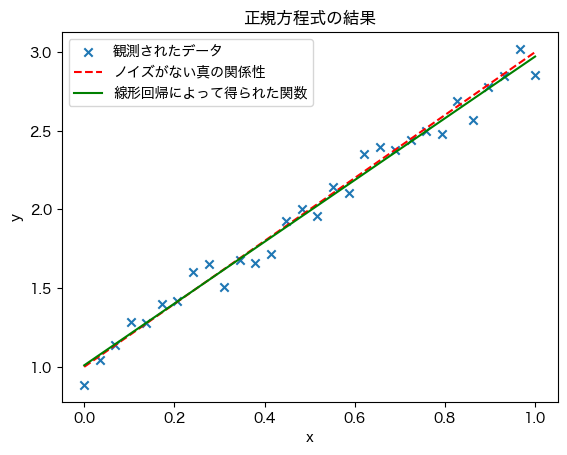

In [74]:
a = W[0]
b = W[1]
y_pred = a * X_ + b

plt.scatter(X_, y, marker='x', label='観測されたデータ')
plt.plot(X_, y_gt, c='r', linestyle='--', label='ノイズがない真の関係性')
plt.plot(X_, y_pred, c='g', label='線形回帰によって得られた関数')
plt.title('正規方程式の結果')
plt.xlabel('x') # x軸のラベルを追加
plt.ylabel('y') # y軸のラベルを追加
plt.legend()

Scikit-Learnを用いずに線形回帰を実行することができた．Pythonは機械学習だけでなく高度なアルゴリズムを提供するライブラリが提供されており便利なプログラミング言語である．しかしながら，言い換えると，機能の使い方さえ調べてしまえば，中身のアルゴリズムを理解せずとも誰でも利用できてしまう．Pythonの第一歩としてのゼロからはじめるプログラミングにおいては，これらの機能を利用できるだけ十分なレベルに到達しているが，受講者の皆さんにはぜひ内部のアルゴリズムまで調べて，**ライブラリを用いず** 自身で **ゼロから** 実装してみることを推奨する．このような経験は線形代数・微積分・確率統計など大学数学を学ぶモチベーションとなるだけでなく，皆さんがこれから学ぶプログラミング，数学，加えて専門科目の理解をより深めてくれるはずである．